# E Navaneet Kumar

# Introduction
In the volatile world of financial markets, accurately predicting future price movements and understanding market behavior are critical for investors, traders, and financial analysts. The primary challenge lies in dealing with the inherent unpredictability and fluctuations in financial data. This project focuses on leveraging advanced time series analysis techniques to forecast financial data, specifically examining returns and volatility. By doing so, I aim to provide a robust framework for better decision-making and risk management.

The significance of this project is based in its ability to enhance forecasting accuracy by combining ARMA (AutoRegressive Moving Average) models with GARCH (Generalized Autoregressive Conditional Heteroskedasticity) models. ARMA models are capable at capturing the linear patterns in time series data, while GARCH models excel at modeling volatility clustering in financial markets. By integrating these models, we can achieve a more comprehensive understanding of market dynamics which offers valuable insights that can aid in strategic planning, risk assessment, and optimizing investment strategies.

## Non-Seasonal Data
* Non-seasonal data does not show periodic patterns. Fluctuations in such data are not tied to a specific season or time of year and can arise from a variety of non-cyclical factors.

## Seasonal Data
* Seasonal data exhibits patterns or behaviors that repeat over a specific period, such as monthly or quarterly. This cyclical nature often corresponds to external factors like weather or holidays.

## ADF Test for Stationarity
* The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine the stationarity of a time series. It tests the null hypothesis that a unit root is present, where its absence (p-value <0.05) indicates stationarity.

## Differencing for Stationarity
* Differencing is a method to make a time series stationary by subtracting the current observation from the previous one. This process, often repeated, removes trends and cycles, making the data more suitable for ARIMA modeling.

## ARIMA Models
* ARIMA (AutoRegressive Integrated Moving Average) models are used for forecasting nonseasonal time series data. It combines autoregressive (AR) terms, differencing for stationarity (I), and moving average (MA) terms, represented as ARIMA(p, d, q), where p, d, and q are nonnegative integers.

## GARCH Models
* GARCH (Generalized AutoRegressive Conditional Heteroskedasticity) models describe the variance of the current error term or innovation as a function of the past squared error terms.Primarily used in financial time series, it captures volatility clustering, where high volatility tends to follow high volatility.

## SARIMA Models
* SARIMA (Seasonal AutoRegressive Integrated Moving Average) extends the ARIMA model by incorporating seasonal elements. It's defined as SARIMA(p, d, q)(P, D, Q)s, where (p, d, q) are non-seasonal orders, (P, D, Q) are seasonal orders, and s is the seasonality period.

## Ljung-Box Test
* The Ljung-Box test assesses whether any of a group of autocorrelations of a time series are different from zero. It tests the null hypothesis that the data are independently distributed. Low p-values (typically < 0.05) indicate significant autocorrelation.

## Shapiro Wilk Test 
* The Shapiro-Wilk test is a statistical test that checks whether a dataset is normally distributed. It calculates a p-value; if this value is small (less than 0.05), it suggests the data does not follow a normal distribution.

# Dataset 
https://finance.yahoo.com/quote/DABUR.NS/history/?guccounter=1&period1=1325376000&period2=1672531200

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import scipy
import warnings
import arch
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DABUR.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,99.300003,101.400002,99.050003,100.449997,89.762779,289745.0
1,2012-01-03,101.000000,101.500000,98.449997,100.900002,90.164902,369216.0
2,2012-01-04,101.199997,102.849998,100.599998,101.099998,90.343620,354686.0
3,2012-01-05,101.199997,101.849998,99.449997,100.050003,89.405334,444672.0
4,2012-01-06,101.199997,101.199997,98.500000,98.800003,88.288345,924778.0


In [3]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,340.821231,344.689219,336.640435,340.496572,324.676184,1.856691e+06
std,151.732568,153.116946,150.038014,151.497707,152.087223,1.560272e+06
min,93.800003,94.900002,92.000000,92.500000,82.658607,0.000000e+00
25%,225.000000,226.850006,221.250000,223.699997,206.195831,8.797650e+05
50%,307.799988,311.000000,303.500000,307.600006,287.562988,1.422545e+06
75%,477.700012,483.649994,471.049988,477.549988,458.896515,2.312806e+06
max,654.849976,658.950012,649.000000,653.950012,638.903931,2.079605e+07


In [4]:
df.isna().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

## Found some unexpected values. Need to remove them 

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
# Check the time range of the dataset
print("Min Date:", df['Date'].min())
print("Max Date:", df['Date'].max())

Min Date: 2012-01-02
Max Date: 2022-12-30


### My data ranges form 2012 to 2022. We will be using 6 years of data for our analysis.

In [8]:
df = df[df['Date'] >= '2017-01-01']


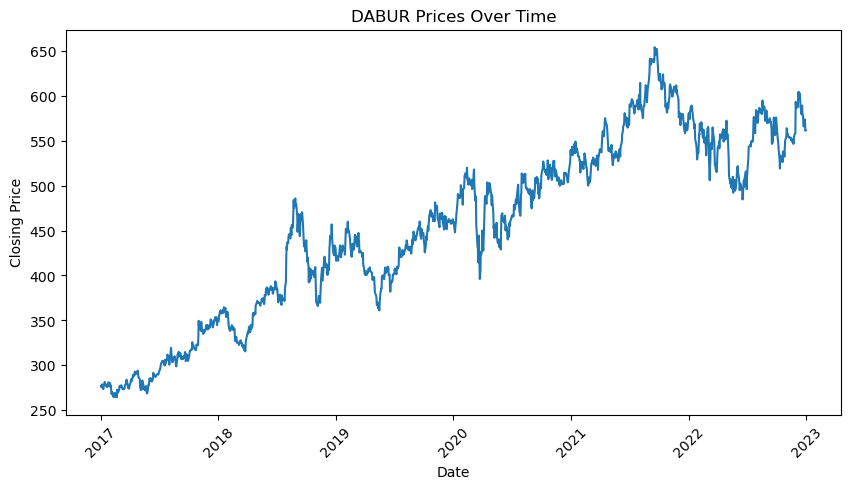

In [9]:
import matplotlib.dates as mdates
# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Plotting the closing prices over time with proper date formatting
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'])
plt.title('DABUR Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
# Using YearLocator to set ticks at the start of each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.show()


### Visualizing the price of DABUR over a period of  6 years

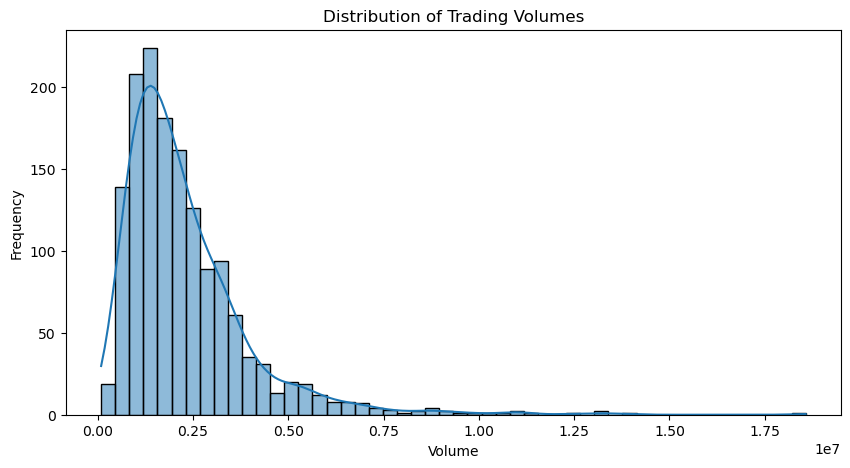

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Volume'], bins=50, kde=True) 
plt.title('Distribution of Trading Volumes')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()


#### The graph depicts the frequency distribution of trading volumes, which is right-skewed rather than normally distributed. This indicates that most trading volumes are relatively low, with a few exceptionally high volumes. The distribution clusters around the lower end, with a long tail extending towards higher volumes which highlights that very large trades are less frequent.

In [11]:
df['Date'] = pd.to_datetime(df['Date'])


In [12]:
df['Returns'] = 100 * df['Close'].pct_change()
df.iloc[0, 7] = 0
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Returns
1235,2017-01-02,278.000000,278.399994,274.399994,277.149994,259.739594,265516.0,0.000000
1236,2017-01-03,277.500000,278.000000,274.399994,275.500000,258.193268,450185.0,-0.595343
1237,2017-01-04,275.100006,278.200012,272.899994,276.549988,259.177338,2110365.0,0.381121
1238,2017-01-05,278.149994,279.950012,276.950012,278.850006,261.332886,508994.0,0.831683
1239,2017-01-06,279.250000,280.500000,275.500000,276.600006,259.224152,782100.0,-0.806885


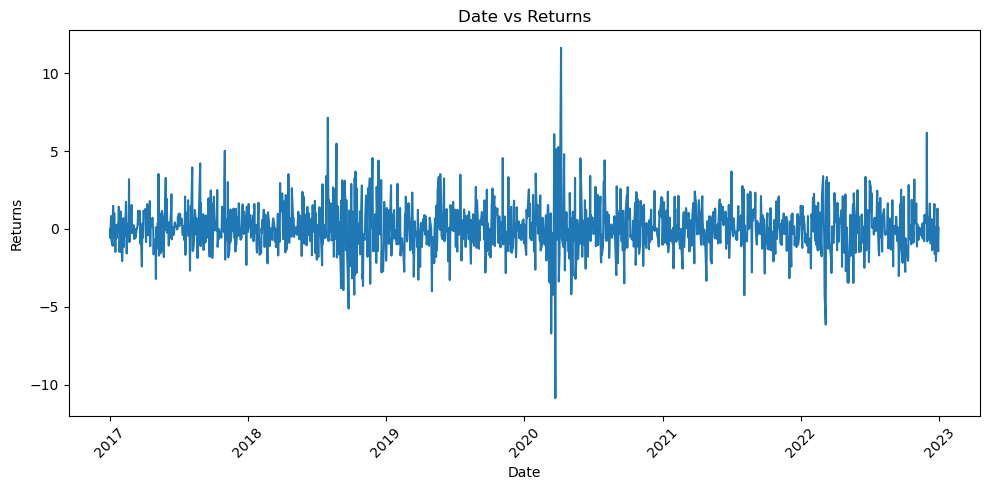

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'].values, df['Returns'].values)
plt.title('Date vs Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### The plot represents the variability or volatility in the returns from 2017 to 2023

# Stationary Test 

In [14]:
def test_stationarity(ts):
    result = adfuller(ts)
    
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    
    # Interpretation of the ADF test
    print('\nHypothesis:')
    print('Null Hypothesis (H0): The series has a unit root (non-stationary).')
    print('Alternative Hypothesis (H1): The series has no unit root (stationary).')
    
    if result[1] > 0.05:
        print("\nFailed to reject the null hypothesis (H0), the data has a unit root and is non-stationary.")
    else:
        print("\nReject the null hypothesis (H0), the data does not have a unit root and is stationary.")

ts = df.set_index('Date')['Returns']
test_stationarity(ts)

ADF Statistic: -12.8142
p-value: 0.0000
Critical Values:
	1%: -3.4348
	5%: -2.8635
	10%: -2.5678

Hypothesis:
Null Hypothesis (H0): The series has a unit root (non-stationary).
Alternative Hypothesis (H1): The series has no unit root (stationary).

Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


### The highly negative ADF statistic of -12.8142, coupled with a practically zero p-value, solidly supports rejecting the null hypothesis. This tells us that the time series data is stationary, meaning it does not have a unit root and shows consistent statistical properties over time.

In [15]:
ts = pd.DataFrame(ts)
ts.head()


,Returns
Date,
2017-01-02,0.000000
2017-01-03,-0.595343
2017-01-04,0.381121
2017-01-05,0.831683
2017-01-06,-0.806885


# ACF and PACF

(-0.2, 0.2)

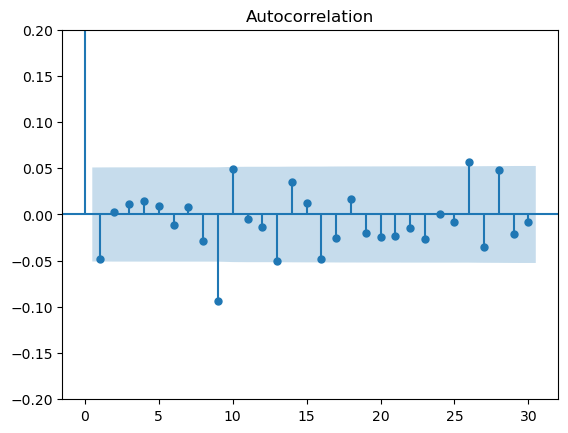

In [16]:
plot_acf(ts['Returns'], lags = 30);
plt.ylim(-0.2,0.2)


(-0.2, 0.2)

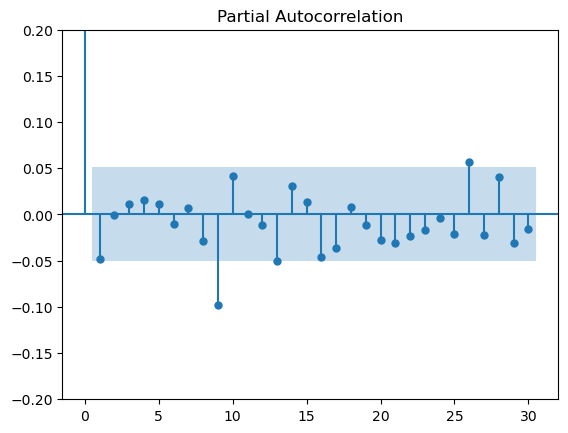

In [17]:
plot_pacf(ts['Returns'], lags = 30);
plt.ylim(-0.2,0.2)


### Based on the ACF and PACF plots I can see the major significant lag is at 9th lag so based on that I will try some models 

# ARMA (6,1)

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model

model = ARIMA(ts['Returns'], order=(6,0,1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Perform residual checks
residuals = model_fit.resid


                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                 1484
Model:                 ARIMA(6, 0, 1)   Log Likelihood               -2696.950
Date:                Thu, 02 May 2024   AIC                           5411.901
Time:                        03:05:00   BIC                           5459.623
Sample:                             0   HQIC                          5429.689
                               - 1484                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0587      0.039      1.490      0.136      -0.019       0.136
ar.L1         -0.0243      2.088     -0.012      0.991      -4.118       4.069
ar.L2          0.0016      0.101      0.016      0.9

# ARMA(6,2)

In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model

model = ARIMA(ts['Returns'], order=(6,0,2))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Perform residual checks
residuals = model_fit.resid


                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                 1484
Model:                 ARIMA(6, 0, 2)   Log Likelihood               -2691.386
Date:                Thu, 02 May 2024   AIC                           5402.772
Time:                        03:05:05   BIC                           5455.797
Sample:                             0   HQIC                          5422.537
                               - 1484                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0606      0.017      3.543      0.000       0.027       0.094
ar.L1          1.2719      0.605      2.101      0.036       0.085       2.458
ar.L2         -0.2732      0.561     -0.487      0.6

# ARMA(6,5)

In [20]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model

model = ARIMA(ts['Returns'], order=(6,0,5))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Perform residual checks
residuals = model_fit.resid


                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                 1484
Model:                 ARIMA(6, 0, 5)   Log Likelihood               -2690.823
Date:                Thu, 02 May 2024   AIC                           5407.646
Time:                        03:05:09   BIC                           5476.578
Sample:                             0   HQIC                          5433.339
                               - 1484                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0585      0.038      1.552      0.121      -0.015       0.132
ar.L1          0.2726      0.095      2.880      0.004       0.087       0.458
ar.L2          0.0394      0.076      0.516      0.6

# ARMA(7,2)

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model

model = ARIMA(ts['Returns'], order=(7,0,2))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Perform residual checks
residuals = model_fit.resid


                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                 1484
Model:                 ARIMA(7, 0, 2)   Log Likelihood               -2689.510
Date:                Thu, 02 May 2024   AIC                           5401.020
Time:                        03:05:13   BIC                           5459.348
Sample:                             0   HQIC                          5422.761
                               - 1484                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0585      0.040      1.447      0.148      -0.021       0.138
ar.L1         -0.1683      0.060     -2.810      0.005      -0.286      -0.051
ar.L2         -0.8721      0.063    -13.905      0.0

In [22]:
# Initialize an empty list to store results
results = []


for p in range(1, 15):
    for q in range(1, 15):
        try:
            # Fit the ARIMA model with the current p and q values
            model = ARIMA(ts['Returns'], order=(p, 0, q))
            model_fit = model.fit()
            # Store p, q, and AIC values
            results.append((p, q, model_fit.aic))
        except:
            # In case the model does not converge or other errors occur
            results.append((p, q, float('inf')))

# Print results
for p, q, aic in results:
    print(f'ARIMA({p}, 0, {q}) : AIC = {aic}')


ARIMA(1, 0, 1) : AIC = 5402.80234389899
ARIMA(1, 0, 2) : AIC = 5396.750865652479
ARIMA(1, 0, 3) : AIC = 5406.299832751347
ARIMA(1, 0, 4) : AIC = 5408.058980352547
ARIMA(1, 0, 5) : AIC = 5409.824994143258
ARIMA(1, 0, 6) : AIC = 5411.744783045005
ARIMA(1, 0, 7) : AIC = 5413.710019457894
ARIMA(1, 0, 8) : AIC = 5403.5864188165215
ARIMA(1, 0, 9) : AIC = 5400.591160948659
ARIMA(1, 0, 10) : AIC = 5402.271164369802
ARIMA(1, 0, 11) : AIC = 5395.173963708938
ARIMA(1, 0, 12) : AIC = 5397.011635015501
ARIMA(1, 0, 13) : AIC = 5403.347645193009
ARIMA(1, 0, 14) : AIC = 5404.7715348949205
ARIMA(2, 0, 1) : AIC = 5404.802334538377
ARIMA(2, 0, 2) : AIC = 5402.248045532302
ARIMA(2, 0, 3) : AIC = 5400.750577730124
ARIMA(2, 0, 4) : AIC = 5410.0347890804915
ARIMA(2, 0, 5) : AIC = 5404.667604331093
ARIMA(2, 0, 6) : AIC = 5406.408887022455
ARIMA(2, 0, 7) : AIC = 5400.835026748442
ARIMA(2, 0, 8) : AIC = 5401.945957885089
ARIMA(2, 0, 9) : AIC = 5398.49044484905
ARIMA(2, 0, 10) : AIC = 5400.489794372526
ARIMA(2, 

In [23]:
# Find the combination with the lowest AIC
lowest_aic = min(results, key=lambda x: x[2])
# Print the result
lowest_aic_p, lowest_aic_q, lowest_aic_value = lowest_aic
print(f"Lowest AIC is {lowest_aic_value} for ARMA({lowest_aic_p}, {lowest_aic_q})")

Lowest AIC is 5388.684198923897 for ARMA(7, 9)


### After some hassle I got the best ARMA model as ARMA(7,9) based on the lowest AIC.

In [24]:
# ARMA model with lowest aic
order = (lowest_aic_p,0, lowest_aic_q)
model_arma_lowest_aic = ARIMA(ts, order=order)
results_arma_lowest_aic = model_arma_lowest_aic.fit()
# Print results
print(results_arma_lowest_aic.summary())

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                 1484
Model:                 ARIMA(7, 0, 9)   Log Likelihood               -2676.342
Date:                Thu, 02 May 2024   AIC                           5388.684
Time:                        03:29:25   BIC                           5484.129
Sample:                             0   HQIC                          5424.260
                               - 1484                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0612      0.016      3.788      0.000       0.030       0.093
ar.L1         -0.2166      0.205     -1.059      0.290      -0.617       0.184
ar.L2         -0.0020      0.187     -0.011      0.9

## Residual Analysis

Text(0.5, 1.0, 'PACF of Residuals')

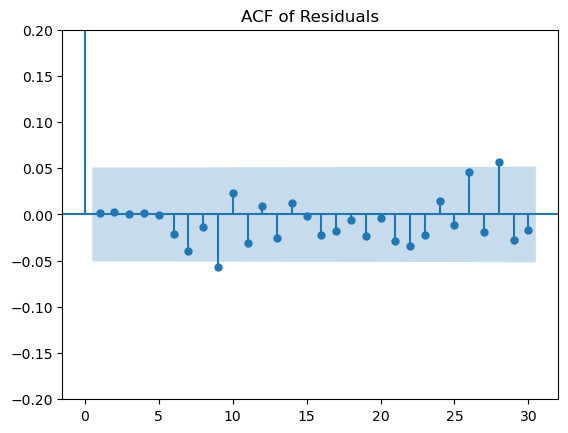

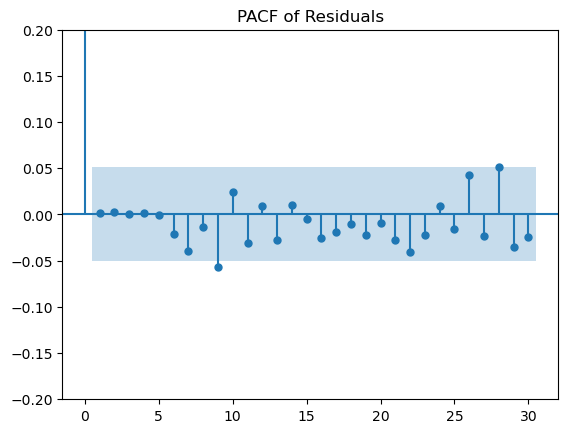

In [25]:
# ACF and PACF plots for the residuals
plot_acf(residuals, lags = 30);
plt.ylim(-0.2,0.2)
plt.title('ACF of Residuals')


plot_pacf(residuals, lags=30);
plt.ylim(-0.2,0.2)
plt.title('PACF of Residuals')


### Almost all lags are inside confidence interval 

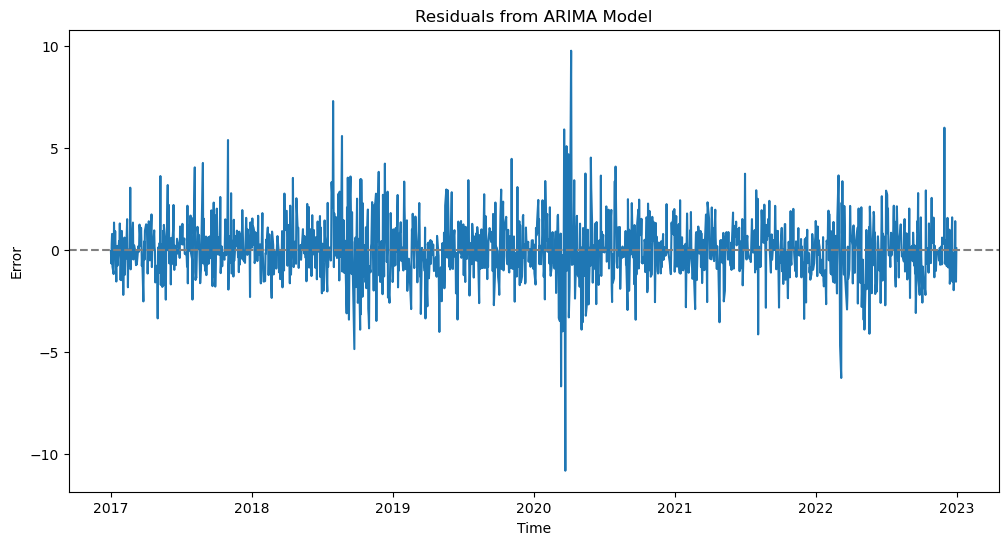

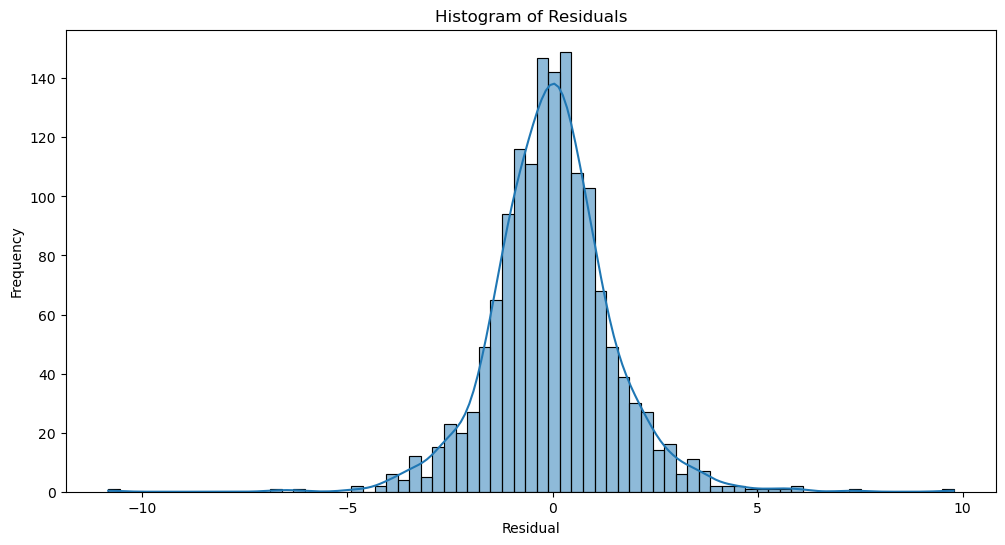

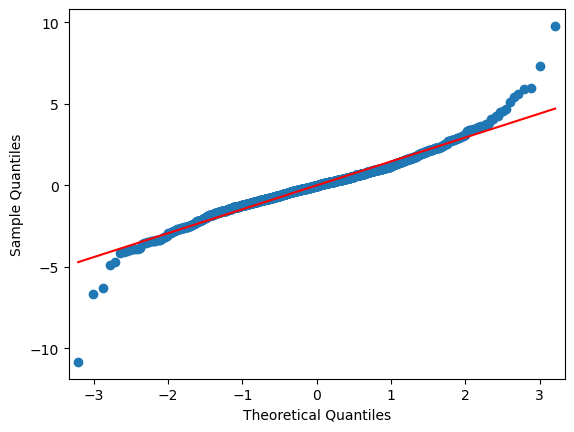

In [26]:
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt


new_order = (7, 0, 9)
model_refined = ARIMA(ts, order=new_order)
results_refined = model_refined.fit()

# Model Diagnostics
residuals = results_refined.resid

# Plot residual errors
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Error')
plt.axhline(0, linestyle='--', color='grey')
plt.show()

# Histogram of the residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='s')
plt.show()



### From the residual plot I can say that there are some periods where the residuals exhibit clustering, indicating phases of higher or lower volatility and also there are a few noticeable spikes, particularly around 2020 indicating outliers.

### The Histogram almost looks normaly distributed.

### For the Q-Q plot the residuals roughly follow the red line in the middle range but deviate at the tails.This indicates that the residuals are not perfectly normally distributed especially in the low and high values.The points deviate significantly from the line at both ends which means the presence of fat tails.

     lb_stat  lb_pvalue
1   0.015407   0.901216
2   0.015550   0.992255
3   0.026794   0.998843
4   0.027181   0.999908
5   0.104061   0.999821
6   0.445925   0.998436
7   0.881197   0.996524
8   0.908812   0.998761
9   1.008531   0.999418
10  1.637731   0.998438
11  1.641909   0.999410
12  1.750939   0.999703
13  1.756485   0.999892
14  2.663878   0.999535
15  2.792380   0.999743
16  2.836102   0.999884
17  3.186230   0.999893
18  3.695923   0.999867
19  4.876459   0.999526
20  5.566965   0.999369
21  6.641558   0.998746
22  7.389885   0.998444
23  7.880760   0.998556
24  8.676179   0.998210
25  8.682269   0.998967


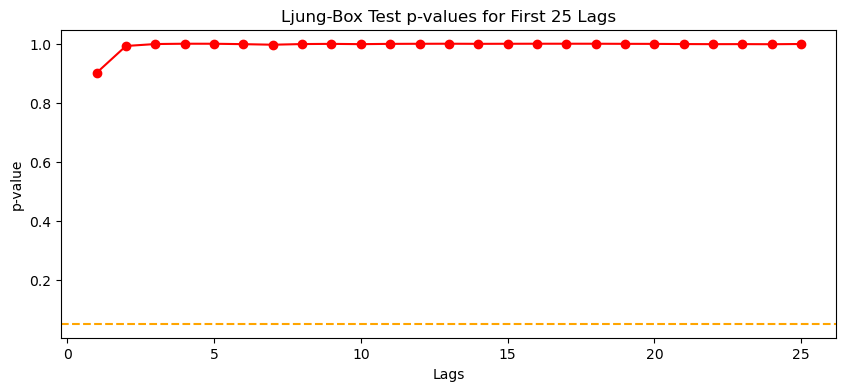

In [27]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt

ljung_box_results = acorr_ljungbox(residuals, lags=25, return_df=True)

# Print the results
print(ljung_box_results)

# Plotting the Ljung-Box test p-values
plt.figure(figsize=(10, 4))
plt.plot(ljung_box_results['lb_pvalue'], marker='o', linestyle='-', color='red')
plt.title('Ljung-Box Test p-values for First 25 Lags')
plt.xlabel('Lags')
plt.ylabel('p-value')
plt.axhline(y=0.05, color='orange', linestyle='--')  # significance line at p = 0.05
plt.show()


### The Ljung-Box test results show that all the p-values are well above the 0.05 significance level across all 25 lags, indicating that there is no autocorrelation that can be seen amongst the residuals. 

In [28]:
from scipy import stats

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)

# Print results and hypothesis information
print(f'Shapiro-Wilk test statistic: {shapiro_test[0]:.4f}, p-value: {shapiro_test[1]:.4f}')

# Hypotheses
print("\nHypotheses:")
print("Null Hypothesis (H0): The data is normally distributed.")
print("Alternative Hypothesis (Ha): The data is not normally distributed.")

# Interpretation
if shapiro_test[1] < 0.05:
    print("\nReject the null hypothesis (H0), suggesting the data is not normally distributed.")
else:
    print("\nFailed to reject the null hypothesis (H0), suggesting the data is normally distributed.")


Shapiro-Wilk test statistic: 0.9601, p-value: 0.0000

Hypotheses:
Null Hypothesis (H0): The data is normally distributed.
Alternative Hypothesis (Ha): The data is not normally distributed.

Reject the null hypothesis (H0), suggesting the data is not normally distributed.


## Forecasting

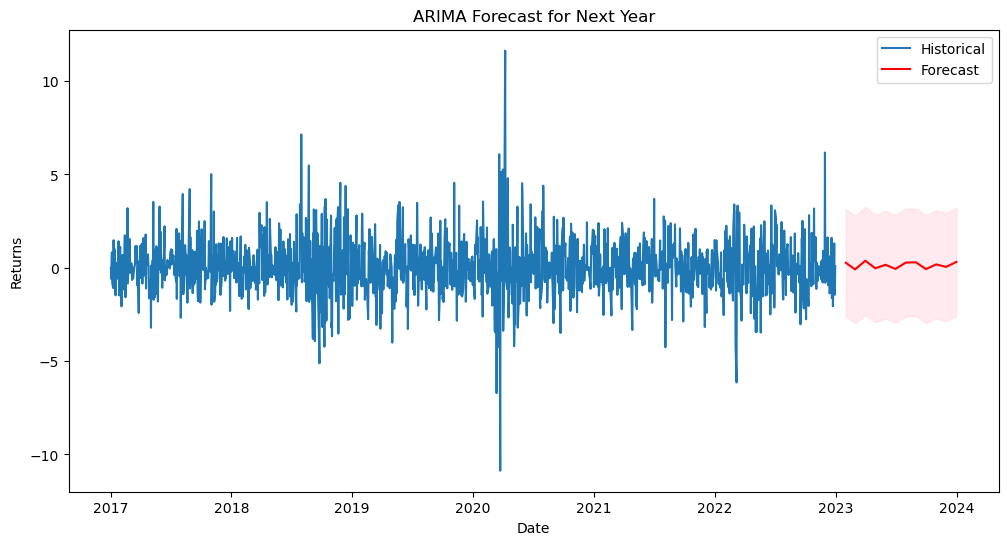

In [29]:
# Forecast the next 12 periods ahead in the future
forecast_steps = 12
forecast = results_refined.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()


last_date = ts.index[-1]

forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='M')[1:]

# Assign the new date range as the index of the forecasted data
forecast_mean.index = forecast_dates
forecast_conf_int.index = forecast_dates

# Plot the forecast alongside the historical data
plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts['Returns'], label='Historical')
plt.plot(forecast_mean.index, forecast_mean, color='red', label='Forecast')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Forecast for Next Year')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


### After performing forecasts using the ARIMA model, I plan to further enhance our analysis by applying a GARCH model to the residuals. This approach will allow us to investigate any potential volatility clustering in the time series data, providing a more nuanced understanding of variability in the model's errors over time.

# GARCH model

Text(0.5, 1.0, 'PACF of Squared Residuals')

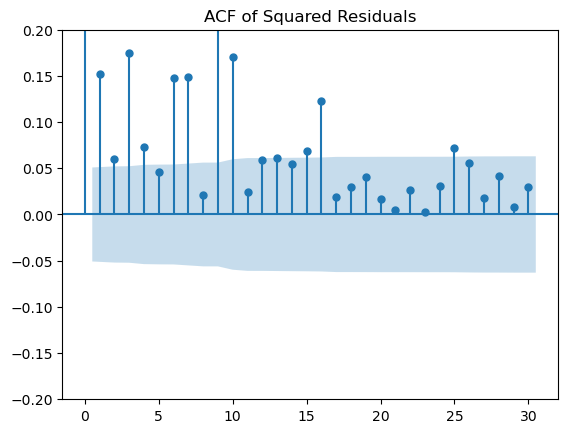

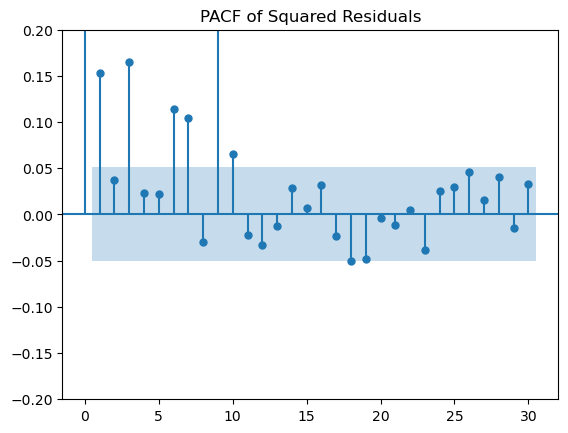

In [30]:
from statsmodels.graphics.tsaplots import plot_acf


squared_residuals = residuals**2

plot_acf(squared_residuals, alpha=0.05, lags = 30);
plt.ylim(-0.2,0.2)
plt.title('ACF of Squared Residuals')


plot_pacf(squared_residuals, alpha=0.05, lags = 30);
plt.ylim(-0.2,0.2)
plt.title('PACF of Squared Residuals')

### Best GARCH model

In [31]:
from arch import arch_model
import numpy as np

squared_residuals = residuals ** 2  # Using squared residuals

# Define the range of p and q values to explore
p_range = range(1, 6)
q_range = range(1, 6)

best_aic = np.inf
best_order = None
best_model = None
aic_values = []  # List to store AIC values and corresponding orders

# Grid search over different combinations of p and q for the GARCH model
for p in p_range:
    for q in q_range:
        try:
            # Specify the GARCH model using the squared residuals
            model = arch_model(squared_residuals, mean='Zero', vol='GARCH', p=p, q=q)
            # Fit the model
            model_fit = model.fit(disp='off', show_warning=False)
            # Save the AIC and order
            aic_values.append((p, q, model_fit.aic))
            # Compare AIC
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = (p, q)
                best_model = model_fit
        except Exception as e:
            print(f'Error fitting GARCH({p},{q}):', str(e))

# Output all AIC values with their corresponding models
for order in aic_values:
    print(f'GARCH({order[0]},{order[1]}) : AIC = {order[2]}')

# Output the results of the grid search
if best_order:
    print(f'\nBest GARCH model order: p={best_order[0]}, q={best_order[1]} with AIC: {best_aic}')
    print(best_model.summary())
else:
    print("\nNo suitable GARCH model was found.")


GARCH(1,1) : AIC = 8406.712273976093
GARCH(1,2) : AIC = 8408.71219033534
GARCH(1,3) : AIC = 8409.012994147526
GARCH(1,4) : AIC = 8402.184983991296
GARCH(1,5) : AIC = 8397.95020857262
GARCH(2,1) : AIC = 8408.712273423294
GARCH(2,2) : AIC = 8410.662853402247
GARCH(2,3) : AIC = 8406.185959364768
GARCH(2,4) : AIC = 8390.969075917903
GARCH(2,5) : AIC = 8392.27674980971
GARCH(3,1) : AIC = 8410.712273486826
GARCH(3,2) : AIC = 8373.673070934725
GARCH(3,3) : AIC = 8375.547143550306
GARCH(3,4) : AIC = 8382.546269503458
GARCH(3,5) : AIC = 8384.546269424083
GARCH(4,1) : AIC = 8373.67307104133
GARCH(4,2) : AIC = 8375.67307063462
GARCH(4,3) : AIC = 8377.547143435753
GARCH(4,4) : AIC = 8384.54626913178
GARCH(4,5) : AIC = 8381.547145275976
GARCH(5,1) : AIC = 8414.71227355095
GARCH(5,2) : AIC = 8377.673070525067
GARCH(5,3) : AIC = 8379.439969170055
GARCH(5,4) : AIC = 8382.624636696317
GARCH(5,5) : AIC = 8384.624638253168

Best GARCH model order: p=3, q=2 with AIC: 8373.673070934725
                    

# Residual Analysis using GARCH

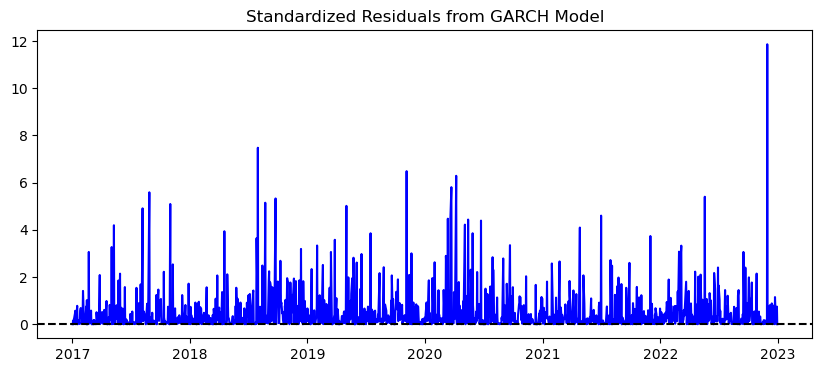

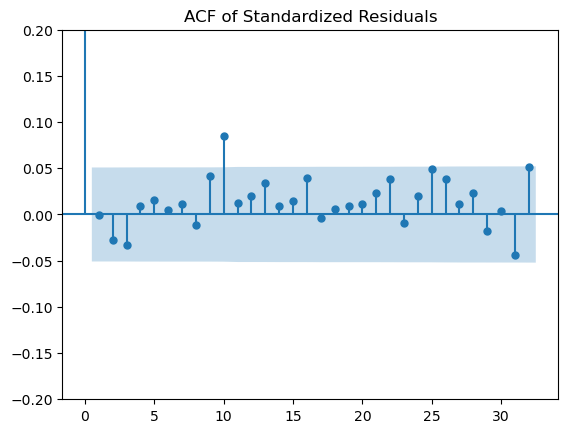

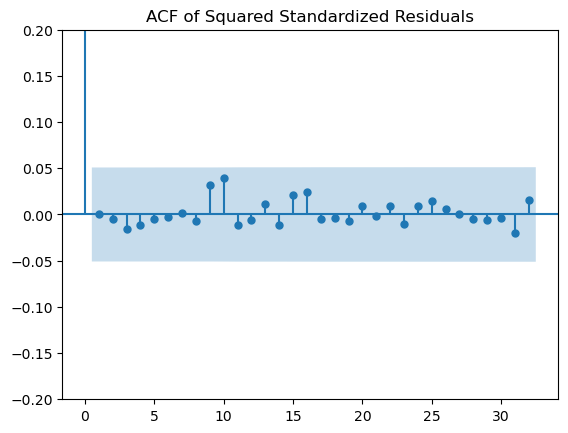

Shapiro-Wilk test statistic: 0.5532, p-value: 0.0000

Hypotheses:
Null Hypothesis (H0): The data is normally distributed.
Alternative Hypothesis (Ha): The data is not normally distributed.

Reject the null hypothesis (H0), suggesting the data is not normally distributed.


In [43]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Get standardized residuals from the GARCH model
std_resid = best_model.resid / best_model.conditional_volatility

# Get squared standardized residuals
squared_std_resid = std_resid**2

# Plot standardized residuals
plt.figure(figsize=(10, 4))
plt.plot(std_resid, color='blue')
plt.title('Standardized Residuals from GARCH Model')
plt.axhline(0, linestyle='--', color='black')
plt.show()

# Plot ACF of standardized residuals
plot_acf(std_resid, alpha=0.05, title='ACF of Standardized Residuals')
plt.ylim(-0.2,0.2)
plt.show()

# Plot ACF of squared standardized residuals
plot_acf(squared_std_resid, alpha=0.05, title='ACF of Squared Standardized Residuals')
plt.ylim(-0.2,0.2)
plt.show()

# Perform Shapiro-Wilk test of normality on the standardized residuals
from scipy import stats

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(std_resid)

# Print results and hypothesis information
print(f'Shapiro-Wilk test statistic: {shapiro_test[0]:.4f}, p-value: {shapiro_test[1]:.4f}')

# Hypotheses
print("\nHypotheses:")
print("Null Hypothesis (H0): The data is normally distributed.")
print("Alternative Hypothesis (Ha): The data is not normally distributed.")

# Interpretation
if shapiro_test[1] < 0.05:
    print("\nReject the null hypothesis (H0), suggesting the data is not normally distributed.")
else:
    print("\nFailed to reject the null hypothesis (H0), suggesting the data is normally distributed.")




     lb_stat  lb_pvalue
1   0.000921   0.975785
2   0.036925   0.981707
3   0.392294   0.941830
4   0.592917   0.963848
5   0.624372   0.986860
6   0.633985   0.995806
7   0.639435   0.998759
8   0.721465   0.999470
9   2.226329   0.987362
10  4.508122   0.921528
11  4.696556   0.944967
12  4.757892   0.965580
13  4.964263   0.975971
14  5.166501   0.983358
15  5.826536   0.982516


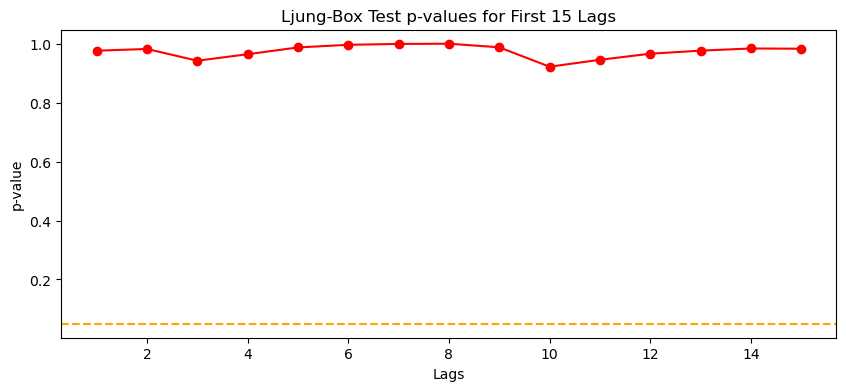

In [44]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt

ljung_box_results = acorr_ljungbox(squared_std_resid, lags=15, return_df=True)

# Print the results
print(ljung_box_results)

# Plotting the Ljung-Box test p-values
plt.figure(figsize=(10, 4))
plt.plot(ljung_box_results['lb_pvalue'], marker='o', linestyle='-', color='red')
plt.title('Ljung-Box Test p-values for First 15 Lags')
plt.xlabel('Lags')
plt.ylabel('p-value')
plt.axhline(y=0.05, color='orange', linestyle='--')  # significance line at p = 0.05
plt.show()



#### The Ljung-Box test results above suggest that there is no significant autocorrelation in the squared standardized residuals for the first 15 lags, as all p-values are well above the 0.05 significance level. 

# Forecasting the Volatility

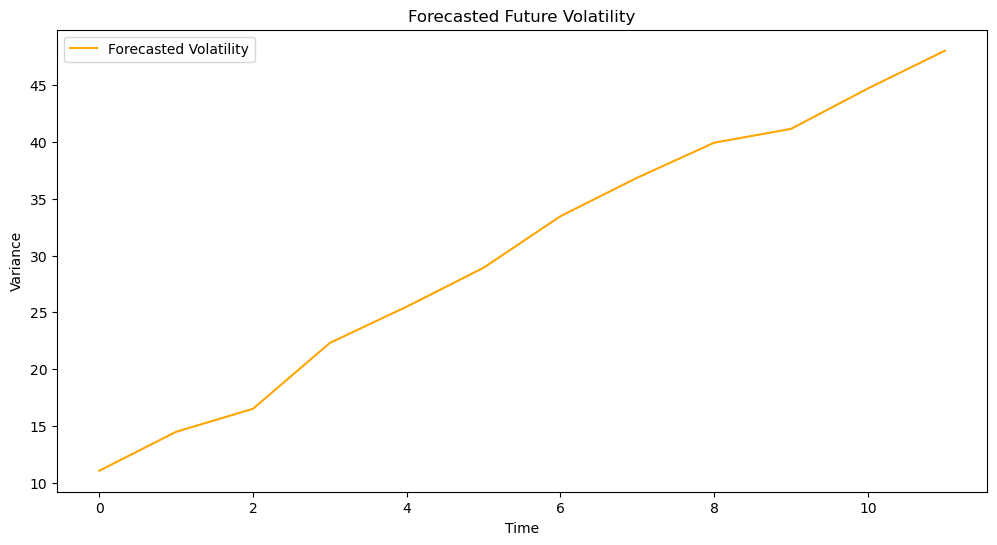

Forecasted Variance:
                 h.01       h.02       h.03       h.04       h.05       h.06  \
Date                                                                           
2022-12-30  11.063933  14.490616  16.513971  22.308658  25.501871  28.922981   

                 h.07       h.08       h.09       h.10       h.11     h.12  
Date                                                                        
2022-12-30  33.458469  36.848685  39.925753  41.144098  44.696202  48.0197  


In [37]:
# Forecast future volatility
forecasts = best_model.forecast(horizon=forecast_steps, start=None, method='simulation', simulations=1000)

# Extract the forecasted variance
future_volatility = forecasts.variance[-1:]

# Plot the forecasted volatility
plt.figure(figsize=(12, 6))
plt.plot(future_volatility.values.flatten(), color='orange', label='Forecasted Volatility')
plt.title('Forecasted Future Volatility')
plt.xlabel('Time')
plt.ylabel('Variance')
plt.legend()
plt.show()

# Display the last forecasted variance
print("Forecasted Variance:")
print(future_volatility)


### The forecast shows that the expected future changes or volatility in the data are likely to increase over time. This means we might see bigger ups and downs in the future. Understanding this helps us prepare for more unpredictable changes and manage risks better.

# Forecating using ARIMA-GARCH

Iteration:     10,   Func. Count:     93,   Neg. LLF: 2591.1412996279223
Iteration:     20,   Func. Count:    178,   Neg. LLF: 2591.0733425361486
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2590.949167266409
            Iterations: 25
            Function evaluations: 221
            Gradient evaluations: 25


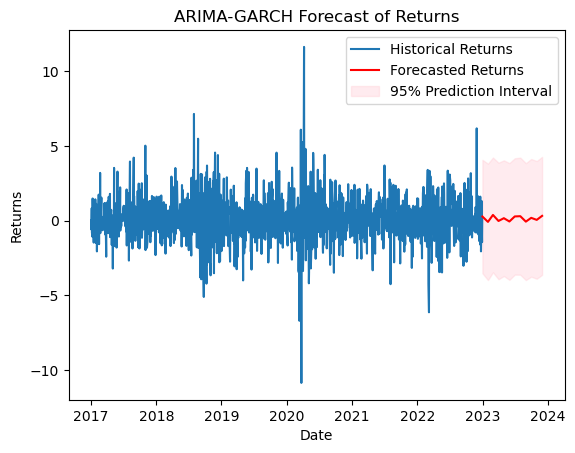

In [38]:
from arch import arch_model
import pandas as pd
import matplotlib.pyplot as plt

# Fit the ARIMA model
arima_model = ARIMA(ts, order=(7,0,9))
arima_results = arima_model.fit()

# Forecast future values with ARIMA
arima_forecast = arima_results.get_forecast(steps=forecast_steps)
forecast_mean = arima_forecast.predicted_mean
forecast_std = arima_forecast.se_mean

# Fit the GARCH model
garch_model = arch_model(arima_results.resid, p=3, q=2)
garch_results = garch_model.fit(update_freq=10)

# Forecast future volatility with GARCH
garch_forecast = garch_results.forecast(horizon=forecast_steps)
forecast_var = garch_forecast.variance.values[-1]

# Combine the ARIMA and GARCH forecasts
forecast_combined_var = forecast_std**2 + forecast_var

# Now, forecast_combined_var contains the forecasted variance for the ARIMA-GARCH model
lower_bound = forecast_mean - 1.96 * np.sqrt(forecast_combined_var)
upper_bound = forecast_mean + 1.96 * np.sqrt(forecast_combined_var)

# Generate future dates
future_dates = pd.date_range(start=ts.index[-1], periods=forecast_steps, freq='M')

# Plot the historical returns
plt.plot(ts.index, ts, label='Historical Returns')

# Plot the forecasted returns
plt.plot(future_dates, forecast_mean, color='red', label='Forecasted Returns')

# Plot the forecasted volatility (95% prediction interval)
plt.fill_between(future_dates, lower_bound, upper_bound, color='pink', alpha=0.3, label='95% Prediction Interval')

# Show the plot
plt.legend()
plt.title('ARIMA-GARCH Forecast of Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()


# Conclusion

### In this project, we utilized advanced forecasting techniques to analyze financial data, identifying the best GARCH model with parameters (3,2) for predicting future volatility. Simultaneously, we selected an ARMA model with parameters (7,9) for the returns data. By integrating these models into an ARIMA-GARCH framework, we effectively captured both the trends and variability in the data, offering a comprehensive view of the market dynamics.

### This combined approach allowed us to generate detailed predictions that included confidence intervals, illustrating the potential future values and the associated uncertainties. The successful application of these techniques provides valuable insights for financial planning and risk management, demonstrating the critical role of appropriate model selection in understanding complex financial behaviors.